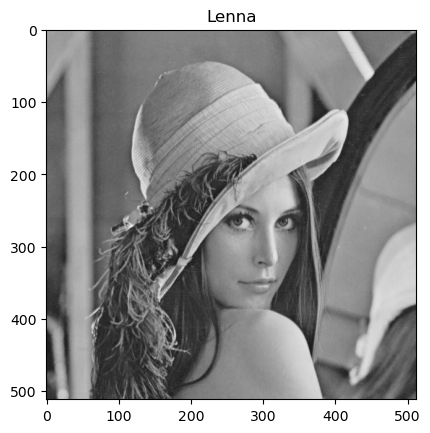

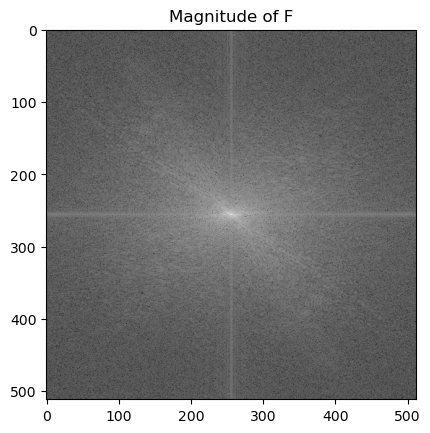

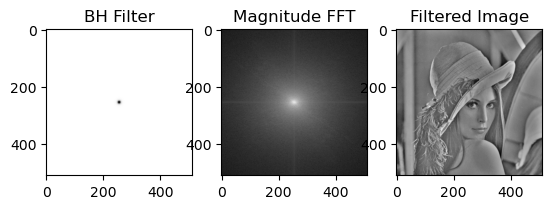

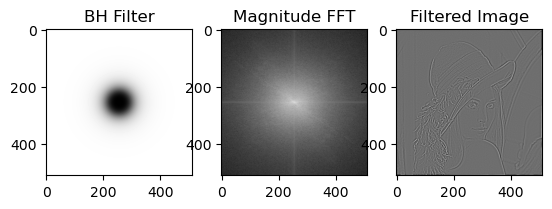

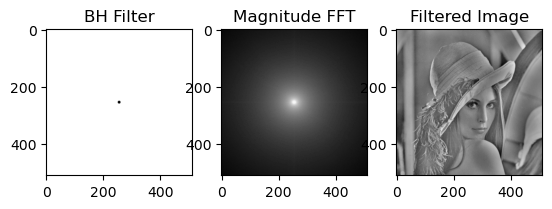

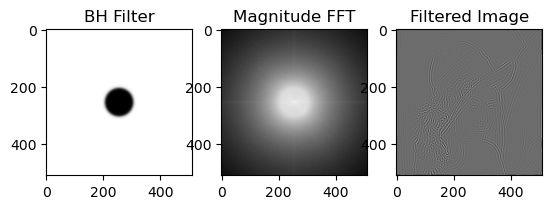

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#####PART 2 B#####
input=cv2.imread("Lenna.png")
plt.imshow(input)
plt.title("Lenna")
plt.show()

input=cv2.cvtColor(input,cv2.COLOR_BGR2GRAY)
def computeFourierTransform(img):
    F=np.fft.fft2(img)
    FShift=np.fft.fftshift(F)
    magnitudeOfF=20*np.log(np.abs(FShift))
    return magnitudeOfF

magnitudeOfF=computeFourierTransform(input)
plt.imshow(magnitudeOfF, cmap='gray')
plt.title("Magnitude of F")
plt.show()

def butterworthLowpassFilter(img, D0, n):
    F=np.fft.fft2(img)
    FShift=np.fft.fftshift(F)
    M, N=img.shape
    u, v=np.meshgrid(np.arange(-N/2, N/2), np.arange(-M/2, M/2))
    Duv=np.sqrt(u**2+v**2)
    H=1/(1+(Duv/D0)**(2*n))
    GShift=H*FShift
    G=np.fft.ifftshift(GShift)
    filteredImg=np.fft.ifft2(G)
    return np.abs(filteredImg), H, GShift

def butterworthHighpassFilter(img, D0, n):
    filteredImg, H, G = butterworthLowpassFilter(img, D0, n)
    return img-filteredImg, 1-H, G

for n, D0 in [(2,5), (2,50), (10,5), (10,50)]:
    filtered, H, G = butterworthHighpassFilter(input, D0, n)
    
    magnitudeOfG=20*np.log(np.abs(G))

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.imshow(H, cmap='gray')
    ax1.set_title("BH Filter")

    ax2.imshow(magnitudeOfG, cmap='gray')
    ax2.set_title("Magnitude FFT")

    ax3.imshow(filtered, cmap='gray')
    ax3.set_title("Filtered Image")
    plt.show()